# Marine Ice Sheet Stability Demo

This is a demonstration of a simple model for the evolution of the grounding line of a marine ice sheet. This was originally written by Prof. Alex Robel for EAS 4803/8803, Glacier and Ice Sheet Dynamics at Georgia Teach. Last updated by Prof. Riley Culberg on 2024-03-29.

## Load Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
# physical parameters
rho_i = 917    #ice density
rho_w = 1028   #water density
g = 9.81       #gravity (in m/s^2)
beta = 4       #GL flux exponent

#time stepping
tf = 6000       #length of simulation
nt = 6000       #number of time steps
dt = tf/nt     #length of time step
L = np.zeros([nt+1]) #pre-allocate volume vector

# Model parameters
L[0] = 1300e3     #initial grounding line position
accum = 0.1       #accumulation rate (in m/yr)
omega = 5e-7      #GL flux coefficient

## Plot Bed Topography and Initial Grounding Line

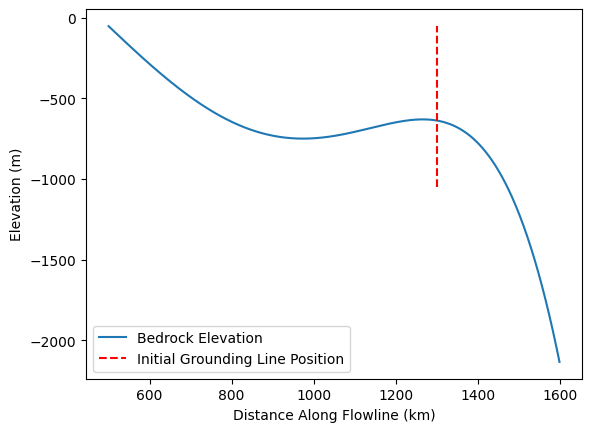

In [4]:
# Plot the bed topography
dist = 1e3*np.arange(500,1600,1)
b = -(729 - 2184.8*(dist/750e3)**2 + 1031.72*(dist/750e3)**4 - 151.72*(dist/750e3)**6)

fig, ax1 = plt.subplots()
ax1.set_ylabel('Elevation (m)')  # we already handled the x-label with ax1
ax1.set_xlabel('Distance Along Flowline (km)')  # we already handled the x-label with ax1
ax1.plot(dist/1000, -b, label = "Bedrock Elevation")
ax1.vlines(L[0]/1000, -1050, -50, 'r', '--', label = "Initial Grounding Line Position")
plt.legend(loc='lower left')
plt.show()

## Run Simple Model

In [5]:
#run model for grounding line Evolution
bed = np.zeros(nt)
for t in range(nt):
    b = -(729 - 2184.8*(L[t]/750e3)**2 + 1031.72*(L[t]/750e3)**4 - 151.72*(L[t]/750e3)**6)   #calculate bed depth at current grounding line position from MISMIP topography
    bed[t] = b
    hg = (rho_w/rho_i)*b      #calculate flotation thickness at GL
    Q_g = omega*(hg**beta)      #calculate GL flux

    dL_dt = (accum*L[t] - Q_g)/hg #calculate RHS of model

    L[t+1] = L[t] + dL_dt*dt       #use forward euler to advance model

## Plot Solution

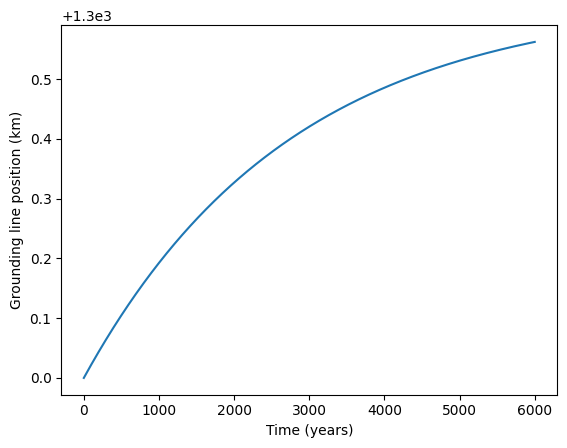

In [6]:
time = np.linspace(0,tf,nt+1)

#plot time evolution of grounding line
fig, ax1 = plt.subplots()
ax1.set_ylabel('Grounding line position (km)')  # we already handled the x-label with ax1
ax1.set_xlabel('Time (years)')  # we already handled the x-label with ax1
ax1.plot(time, L/1e3)
plt.show()

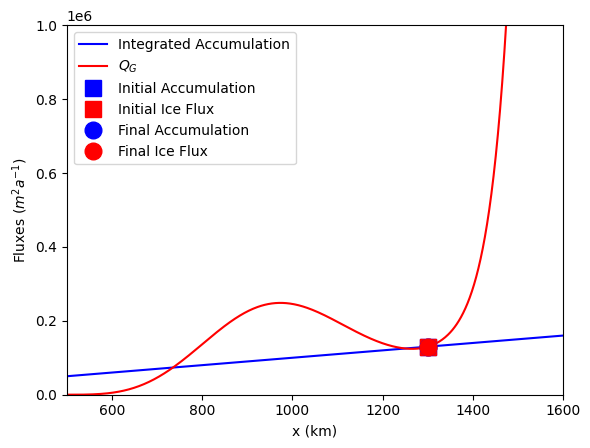

In [7]:
x = np.linspace(0,1600e3,1000)
hgs = -(rho_w/rho_i)*(729 - 2184.8*(x/750e3)**2 + 1031.72*(x/750e3)**4 - 151.72*(x/750e3)**6)
hgsl = -(rho_w/rho_i)*(729 - 2184.8*(L/750e3)**2 + 1031.72*(L/750e3)**4 - 151.72*(L/750e3)**6)

#plot graphical stability analysis
fig, ax1 = plt.subplots()
ax1.set_ylabel('Fluxes ($m^2a^{-1}$)')  # we already handled the x-label with ax1
ax1.set_xlabel('x (km)')  # we already handled the x-label with ax1
ax1.plot(x/1e3, accum*x,'b', label="Integrated Accumulation")
ax1.plot(x/1e3, omega*(hgs**beta),'r', label="$Q_G$")
ax1.plot(L[0]/1e3, accum*L[0],'bs', markersize=12, label = "Initial Accumulation")
ax1.plot(L[0]/1e3, omega*(hgsl[0]**beta),'rs', markersize=12, label = "Initial Ice Flux")
ax1.plot(L[-1]/1e3, accum*L[-1],'bo', markersize=12, label = "Final Accumulation")
ax1.plot(L[-1]/1e3, omega*(hgsl[-1]**beta),'ro', markersize=12, label = "Final Ice Flux")
plt.legend()
plt.ylim(0,10e5)
plt.xlim(500,1600)
plt.show()

## Plot Bed Topography and Final Grounding Line Position

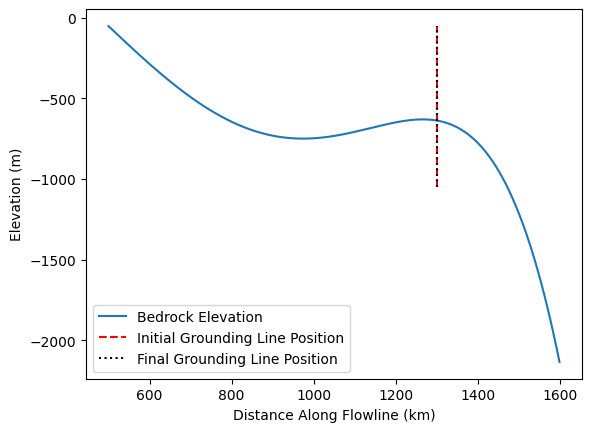

In [8]:
dist = 1e3*np.arange(500,1600,1)
b = -(729 - 2184.8*(dist/750e3)**2 + 1031.72*(dist/750e3)**4 - 151.72*(dist/750e3)**6)

# plot bed topography with inital and final grounding lines
fig, ax1 = plt.subplots()
ax1.set_ylabel('Elevation (m)')  # we already handled the x-label with ax1
ax1.set_xlabel('Distance Along Flowline (km)')  # we already handled the x-label with ax1
ax1.plot(dist/1000, -b, label = "Bedrock Elevation")
ax1.vlines(L[0]/1000, -1050, -50, 'r', '--', label = "Initial Grounding Line Position")
ax1.vlines(L[-1]/1e3, -1050, -50, 'k', ':', label = "Final Grounding Line Position")
plt.legend(loc='lower left')
plt.show()